### Eknoor Singh
### 20853256
### April 12th,2024

# SYDE 552 Assignment 4: Basal Ganglia
### Due Monday, April 8, 11:59pm
### Value: 15% of total marks for the course

This assignment covers various forms of Action Selection, covering a standard feed-forward neural network model and a winner-take-all model.  The last section adds biological details to the winner-take-all model (synapses).  The intent is to show the creation a modification of small specific-purpose networks and to explore how timing affects neurons.

You can work in groups to do the assignment, but your answers and code must be original to you. Your submission will be a filled-out copy of this notebook (cells for code and written answers provided).

# 1. Action Selection with Feed-forward Neural Networks

In order for the brain to choose which of many possible actions to select to perform at any given moment, it needs to be able to takke a list of numbers (indicating how good each action is in the current state, sometimes called the Value) and create an output that indicates which one is the largest.  For example, with the input `[0.2, 0.5, 0.8, 0.3]` we might want the output `[0, 0, 1, 0]`.  

One way to approach this task is to train a normal feed-forward neural network on this task.  This would be similar to the digit recognition task from Assignment 2, except we would just have the list of values as input instead of the image.

To create the dataset for training the network, we can just generate a random set of values between 0 and 1, and then compute which one is biggest to produce our target value.

In [1]:
import numpy as np

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

In order to train with this data in pytorch, we need to turn that array into a pytorch dataset, and to split it into training and testing.


In [2]:
import torch
dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)


Now we have to define our network.  Here we define a simple neural network with 4 inputs, a hidden layer of 100 neurons, and 4 outputs.

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(100, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return x
    
network = Net()

Finally, we have to train the model.  Here is the exact same code from Assignemnt 2 for training


In [5]:

# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


**1. a) [1 mark]** Call `continue_training()` 10 times and then plot the training and testing accuracy (as you did in assignment 2 question 3a.

Iteration 1 Training accuracy: 0.2615000009536743
Iteration 1 Testing accuracy: 0.2475000023841858
Iteration 2 Training accuracy: 0.2615000009536743
Iteration 2 Testing accuracy: 0.2475000023841858
Iteration 3 Training accuracy: 0.2615000009536743
Iteration 3 Testing accuracy: 0.2475000023841858
Iteration 4 Training accuracy: 0.2615000009536743
Iteration 4 Testing accuracy: 0.2475000023841858
Iteration 5 Training accuracy: 0.2395000010728836
Iteration 5 Testing accuracy: 0.2485000044107437
Iteration 6 Training accuracy: 0.2395000010728836
Iteration 6 Testing accuracy: 0.2485000044107437
Iteration 7 Training accuracy: 0.2395000010728836
Iteration 7 Testing accuracy: 0.2485000044107437
Iteration 8 Training accuracy: 0.2395000010728836
Iteration 8 Testing accuracy: 0.2485000044107437
Iteration 9 Training accuracy: 0.2395000010728836
Iteration 9 Testing accuracy: 0.2485000044107437
Iteration 10 Training accuracy: 0.2395000010728836
Iteration 10 Testing accuracy: 0.2485000044107437


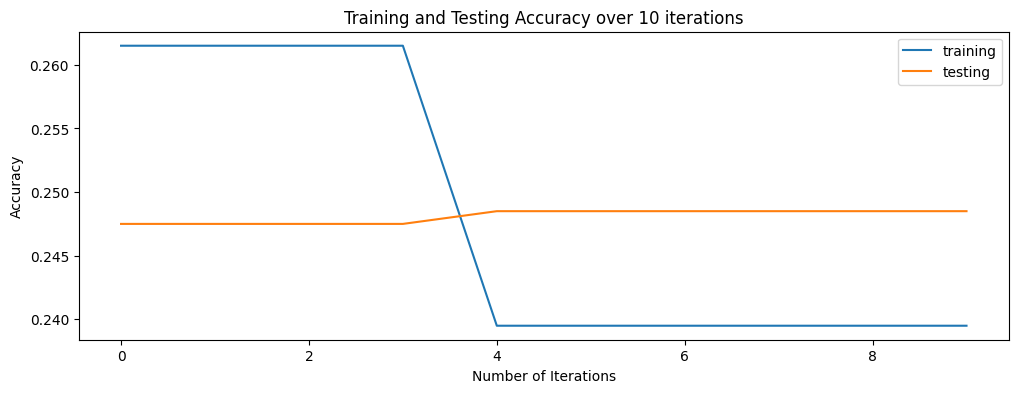

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(100, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return x

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

network = Net()

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)


# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over 10 iterations')
plt.show() 

**1. b) [1 mark]** In the previous question, the model did not get a very high accuracy.  To try to improve the accuracy, let's vary the number of neurons.  Try using 200 neurons, 500 neurons, and 1000 neurons.  For each one, generate the same plot as in 1a.  Does making the network larger in this way improve performance significantly?

Iteration 1 Training accuracy: 0.21150000393390656
Iteration 1 Testing accuracy: 0.21799999475479126
Iteration 2 Training accuracy: 0.21150000393390656
Iteration 2 Testing accuracy: 0.21799999475479126
Iteration 3 Training accuracy: 0.21150000393390656
Iteration 3 Testing accuracy: 0.21799999475479126
Iteration 4 Training accuracy: 0.21150000393390656
Iteration 4 Testing accuracy: 0.21799999475479126
Iteration 5 Training accuracy: 0.21150000393390656
Iteration 5 Testing accuracy: 0.21799999475479126
Iteration 6 Training accuracy: 0.21150000393390656
Iteration 6 Testing accuracy: 0.21799999475479126
Iteration 7 Training accuracy: 0.21150000393390656
Iteration 7 Testing accuracy: 0.21799999475479126
Iteration 8 Training accuracy: 0.21150000393390656
Iteration 8 Testing accuracy: 0.21799999475479126
Iteration 9 Training accuracy: 0.21150000393390656
Iteration 9 Testing accuracy: 0.21799999475479126
Iteration 10 Training accuracy: 0.21150000393390656
Iteration 10 Testing accuracy: 0.217999

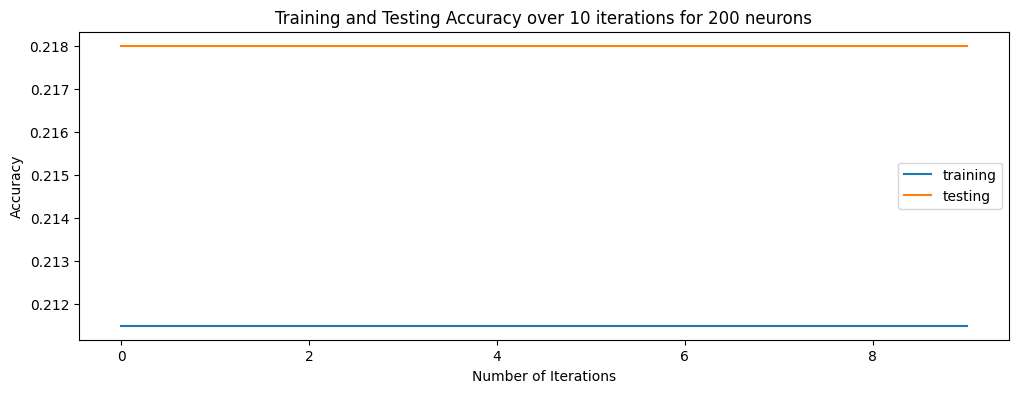

Iteration 1 Training accuracy: 0.15837499499320984
Iteration 1 Testing accuracy: 0.16850000619888306
Iteration 2 Training accuracy: 0.15837499499320984
Iteration 2 Testing accuracy: 0.16850000619888306
Iteration 3 Training accuracy: 0.15837499499320984
Iteration 3 Testing accuracy: 0.16850000619888306
Iteration 4 Training accuracy: 0.15837499499320984
Iteration 4 Testing accuracy: 0.16850000619888306
Iteration 5 Training accuracy: 0.15837499499320984
Iteration 5 Testing accuracy: 0.16850000619888306
Iteration 6 Training accuracy: 0.15837499499320984
Iteration 6 Testing accuracy: 0.16850000619888306
Iteration 7 Training accuracy: 0.15837499499320984
Iteration 7 Testing accuracy: 0.16850000619888306
Iteration 8 Training accuracy: 0.15837499499320984
Iteration 8 Testing accuracy: 0.16850000619888306
Iteration 9 Training accuracy: 0.15837499499320984
Iteration 9 Testing accuracy: 0.16850000619888306
Iteration 10 Training accuracy: 0.15837499499320984
Iteration 10 Testing accuracy: 0.168500

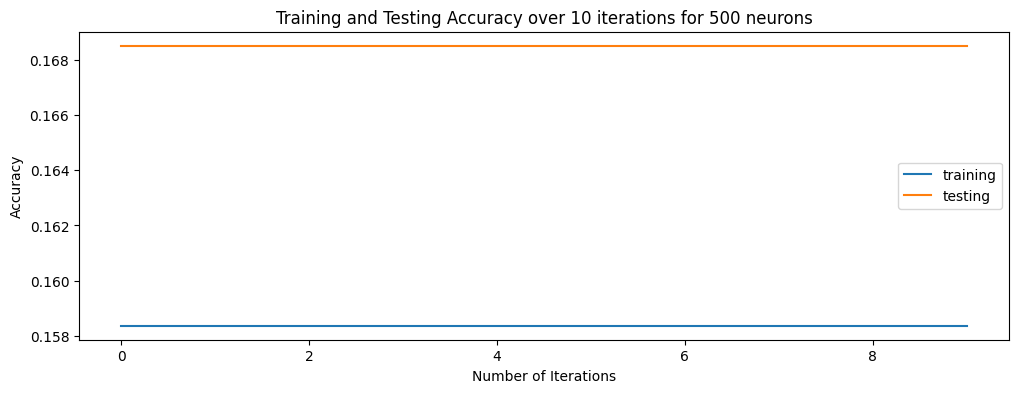

Iteration 1 Training accuracy: 0.23899999260902405
Iteration 1 Testing accuracy: 0.2345000058412552
Iteration 2 Training accuracy: 0.23899999260902405
Iteration 2 Testing accuracy: 0.2345000058412552
Iteration 3 Training accuracy: 0.23899999260902405
Iteration 3 Testing accuracy: 0.2345000058412552
Iteration 4 Training accuracy: 0.23899999260902405
Iteration 4 Testing accuracy: 0.2345000058412552
Iteration 5 Training accuracy: 0.23899999260902405
Iteration 5 Testing accuracy: 0.2345000058412552
Iteration 6 Training accuracy: 0.23899999260902405
Iteration 6 Testing accuracy: 0.2345000058412552
Iteration 7 Training accuracy: 0.23899999260902405
Iteration 7 Testing accuracy: 0.2345000058412552
Iteration 8 Training accuracy: 0.23899999260902405
Iteration 8 Testing accuracy: 0.2345000058412552
Iteration 9 Training accuracy: 0.23899999260902405
Iteration 9 Testing accuracy: 0.2345000058412552
Iteration 10 Training accuracy: 0.23899999260902405
Iteration 10 Testing accuracy: 0.234500005841255

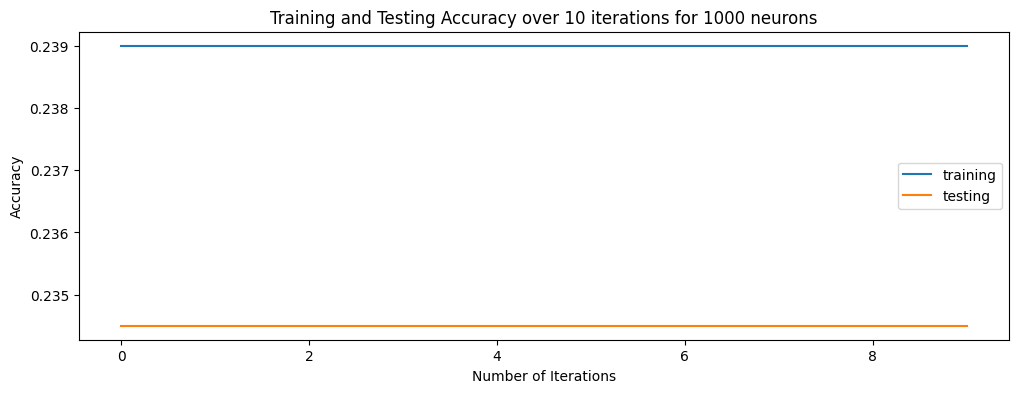

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, HL):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, HL)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(HL, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return x

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)


# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy

neurons = [200,500,1000]
for j in neurons:
    network = Net(j)
    accuracy_train = []
    accuracy_test = []
    for i in range(10):
        continue_training()
    
    plt.figure(figsize=(12,4))
    plt.plot(accuracy_train, label='training')
    plt.plot(accuracy_test, label='testing')
    plt.legend()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy over 10 iterations for ' + str(j) + ' neurons')
    plt.show()

In comparison to the plot generated in question 1A, all three plots above produced lower training and testing accuracies across the board. Increasing the number of neurons isn't sufficient enough for increasing the model's performance.

**1. c) [1 mark]** Try making the network deeper by adding a second layer of neurons.  Use 500 neurons in each of the two middle layers.  Generate the same plot as in 1a.  Does making the network larger in this way improve performance significantly?

Iteration 1 Training accuracy: 0.24387499690055847
Iteration 1 Testing accuracy: 0.2409999966621399
Iteration 2 Training accuracy: 0.24387499690055847
Iteration 2 Testing accuracy: 0.2409999966621399
Iteration 3 Training accuracy: 0.24387499690055847
Iteration 3 Testing accuracy: 0.2409999966621399
Iteration 4 Training accuracy: 0.24387499690055847
Iteration 4 Testing accuracy: 0.2409999966621399
Iteration 5 Training accuracy: 0.24387499690055847
Iteration 5 Testing accuracy: 0.2409999966621399
Iteration 6 Training accuracy: 0.24387499690055847
Iteration 6 Testing accuracy: 0.2409999966621399
Iteration 7 Training accuracy: 0.24387499690055847
Iteration 7 Testing accuracy: 0.2409999966621399
Iteration 8 Training accuracy: 0.24387499690055847
Iteration 8 Testing accuracy: 0.2409999966621399
Iteration 9 Training accuracy: 0.24387499690055847
Iteration 9 Testing accuracy: 0.2409999966621399
Iteration 10 Training accuracy: 0.24387499690055847
Iteration 10 Testing accuracy: 0.240999996662139

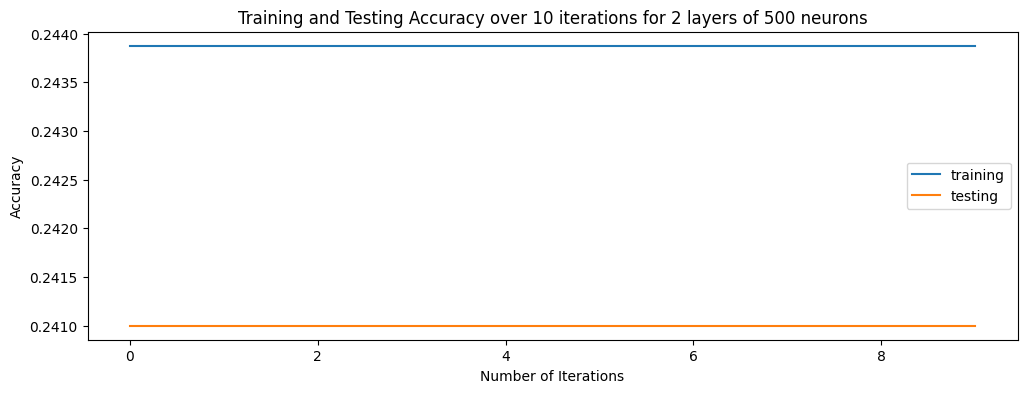

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 500)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(500, 500)    # the weights from the input to the new learned features (hidden layer)
        self.fc3 = nn.Linear(500, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = F.relu(self.fc2(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc3(x)                 # apply the second set of weights
        return x

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)


# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy


network = Net()
accuracy_train = []
accuracy_test = []
for i in range(10):
    continue_training()
    
plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over 10 iterations for 2 layers of 500 neurons')
plt.show()

Similar to question 1B, comparing the generated plot to question 1A, the inclusion of 2 layers of 500 neurons wasn't sufficient in enhancing the model's performance. 

**1. d) [1 mark]** Starting with the original model in question 1a, let's modify the network in a different way.  In particular, in the current version of the model we have no neuron model at the output.  This is due to this part of the code:

```python
    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = self.fc2(x)                 # apply the second set of weights
        return x
```

For the first line (the hidden layer), we use a Rectified Linear neuron model (`F.relu`).  But we aren't doing that with the second line, where it creates the output.  Let's try adding a neuron model there by changing `x = self.fc2(x)` to `x = F.relu(self.fc2(x))`.

Train the model again (by calling `continue_training` 10 times) and make the same plot as above.  Does this improve performance significantly?

Iteration 1 Training accuracy: 0.25037500262260437
Iteration 1 Testing accuracy: 0.2615000009536743
Iteration 2 Training accuracy: 0.25037500262260437
Iteration 2 Testing accuracy: 0.2615000009536743
Iteration 3 Training accuracy: 0.25037500262260437
Iteration 3 Testing accuracy: 0.2615000009536743
Iteration 4 Training accuracy: 0.25037500262260437
Iteration 4 Testing accuracy: 0.2615000009536743
Iteration 5 Training accuracy: 0.25037500262260437
Iteration 5 Testing accuracy: 0.2615000009536743
Iteration 6 Training accuracy: 0.25037500262260437
Iteration 6 Testing accuracy: 0.2615000009536743
Iteration 7 Training accuracy: 0.25037500262260437
Iteration 7 Testing accuracy: 0.2615000009536743
Iteration 8 Training accuracy: 0.25037500262260437
Iteration 8 Testing accuracy: 0.2615000009536743
Iteration 9 Training accuracy: 0.25037500262260437
Iteration 9 Testing accuracy: 0.2615000009536743
Iteration 10 Training accuracy: 0.25037500262260437
Iteration 10 Testing accuracy: 0.261500000953674

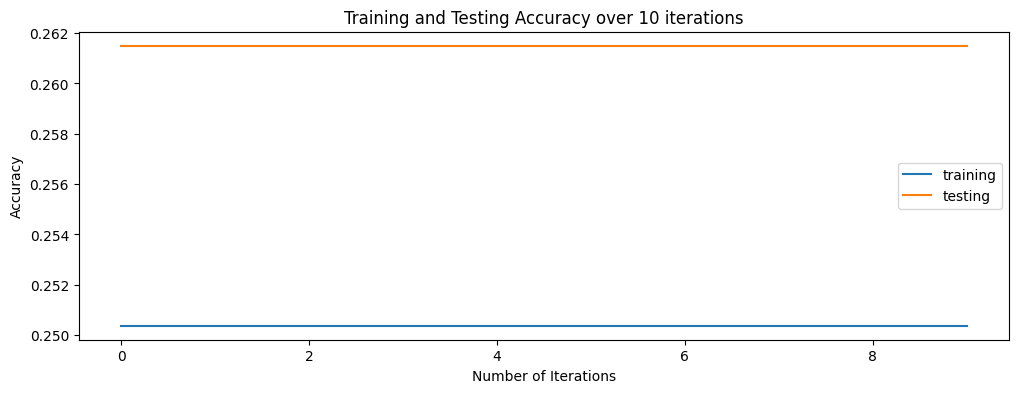

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(100, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = F.relu(self.fc2(x))              # apply the second set of weights
        return x

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

network = Net()

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)


# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over 10 iterations')
plt.show()

Similar to the outcomes of questions 1B and 1C, no real significant change was observed in the plot generated above. 

**1. e) [1 mark]** Repeat 1.d but use `F.sigmoid` instead of `F.relu` for the output.  Plot the same graph as before.  You should see that this change makes an improvement over the results in the previous questions.  Why is this the case?

Iteration 1 Training accuracy: 0.7068750262260437
Iteration 1 Testing accuracy: 0.7070000171661377
Iteration 2 Training accuracy: 0.7417500019073486
Iteration 2 Testing accuracy: 0.737500011920929
Iteration 3 Training accuracy: 0.7475000023841858
Iteration 3 Testing accuracy: 0.7505000233650208
Iteration 4 Training accuracy: 0.7521250247955322
Iteration 4 Testing accuracy: 0.753000020980835
Iteration 5 Training accuracy: 0.753250002861023
Iteration 5 Testing accuracy: 0.7595000267028809
Iteration 6 Training accuracy: 0.7544999718666077
Iteration 6 Testing accuracy: 0.7609999775886536
Iteration 7 Training accuracy: 0.7557500004768372
Iteration 7 Testing accuracy: 0.7630000114440918
Iteration 8 Training accuracy: 0.7552499771118164
Iteration 8 Testing accuracy: 0.7630000114440918
Iteration 9 Training accuracy: 0.7558749914169312
Iteration 9 Testing accuracy: 0.7630000114440918
Iteration 10 Training accuracy: 0.7561249732971191
Iteration 10 Testing accuracy: 0.7639999985694885


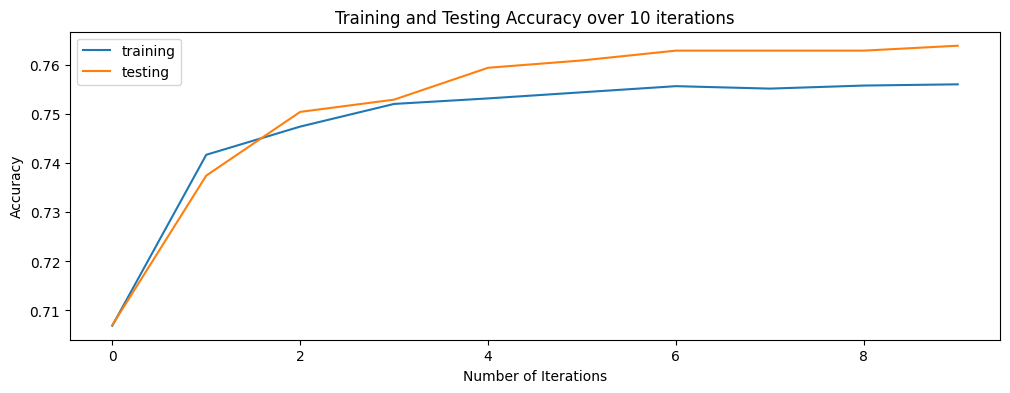

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(100, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = F.sigmoid(self.fc2(x))              # apply the second set of weights
        return x

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

network = Net()

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)


# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over 10 iterations')
plt.show()

**1. f) [1 mark]** Try replacing the `F.sigmoid` with `F.softmax`.  The softmax function will scale up the largest value while scaling down the smaller values.  Repeat the previous question and plot the same graph.  You should see an even bigger improvement.  Why is this the case?  

C:\Users\amoli\AppData\Local\Temp\ipykernel_25396\922354036.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))              # apply the second set of weights


Iteration 1 Training accuracy: 0.7730000019073486
Iteration 1 Testing accuracy: 0.7820000052452087
Iteration 2 Training accuracy: 0.9476249814033508
Iteration 2 Testing accuracy: 0.9490000009536743
Iteration 3 Training accuracy: 0.9751250147819519
Iteration 3 Testing accuracy: 0.9789999723434448
Iteration 4 Training accuracy: 0.9856250286102295
Iteration 4 Testing accuracy: 0.984499990940094
Iteration 5 Training accuracy: 0.9897500276565552
Iteration 5 Testing accuracy: 0.9890000224113464
Iteration 6 Training accuracy: 0.9917500019073486
Iteration 6 Testing accuracy: 0.9894999861717224
Iteration 7 Training accuracy: 0.9907500147819519
Iteration 7 Testing accuracy: 0.9894999861717224
Iteration 8 Training accuracy: 0.9913750290870667
Iteration 8 Testing accuracy: 0.9900000095367432
Iteration 9 Training accuracy: 0.9913750290870667
Iteration 9 Testing accuracy: 0.9904999732971191
Iteration 10 Training accuracy: 0.9917500019073486
Iteration 10 Testing accuracy: 0.9879999756813049


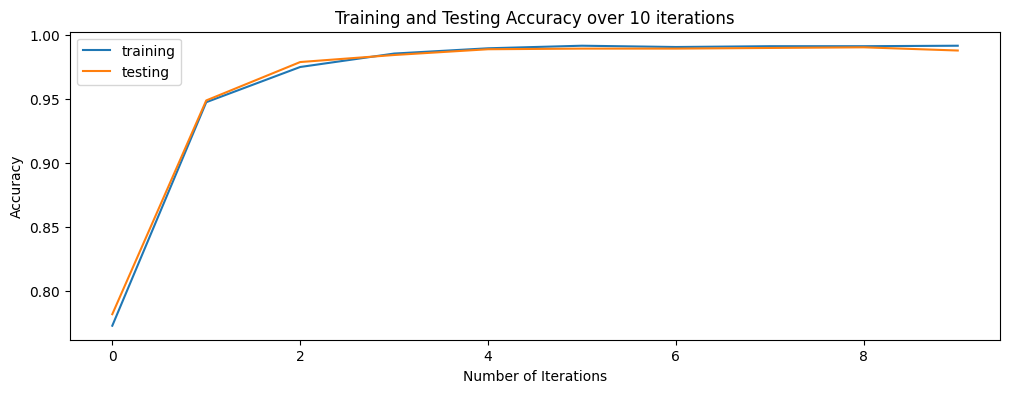

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 100)    # the weights from the input to the new learned features (hidden layer)
        self.fc2 = nn.Linear(100, 4)    # the weights from the hidden layer to the output

    def forward(self, x):
        # the processing the network will do
        x = F.relu(self.fc1(x))         # apply the first set of weights, then apply the ReLU neuron model
        x = F.softmax(self.fc2(x))              # apply the second set of weights
        return x

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)

network = Net()

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

dataset = torch.utils.data.TensorDataset(torch.Tensor(X),torch.Tensor(Y).long()) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=True)


# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

for i in range(10):
    continue_training()

plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy over 10 iterations')
plt.show()

**1. g) [1 mark]** Even though the model you built in 1f) does a good job of solving the task of producing the correct output, it seems to do this only if we include a `softmax` operation.  How might this be considered "cheating" (and thus this should not considered to be a good model of action selection in the brain)? 

# 2. Action Selection with Winner-Take-All

Given the results of the previous section, we need a different approach to do action selection.  Since a feed-forward approach led to difficulties, here we will explore a recurrent network: the standard "winner-take-all" circuit.  In this system, each neuron excites itself but inhibits the other neurons.

Crucially, since this approach is recurrent, we can't just feed in an input and get an output.  Instead, we will feed in an input over time and see what the output is over time.  Rather than implement this in `pytorch`, we will just use normal numpy commands.

The main configurable part of the model is how nuch the neurons excite themselves and how much they inhibit other neurons.  We can build this as a weight matrix that has the excitation on the diagonal and the inhibition everywhere else:


In [5]:
w = np.zeros((N,N))
w[:] = -0.9   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 1   # set the excitatory connection
    
print(w)

[[ 1.  -0.9 -0.9 -0.9]
 [-0.9  1.  -0.9 -0.9]
 [-0.9 -0.9  1.  -0.9]
 [-0.9 -0.9 -0.9  1. ]]


To run the model, we pick a particular input that set that we will provide.  We then feed that value into the model, and add the value that the neurons send back to themselves.  We also include a `clip` operation that stops the neuron value from going below 0 or above 1.  We repeat this process multiple times, and we record the activity of the neurons so we can plot it afterwards.

In [ ]:
record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially
for i in range(10):
    # the new neuron value is the old value times the weight matrix (for the neurons 
    #  inhibiting and exciting each other), plus the input benig added.
    # we also clip the neurons so their activity doesn't go below 0 or above 1
    activity = np.clip(input_values + w @ activity, 0, 1)
    record.append(activity)

**2. a) [1 mark]**  Run the model with an input of `[0.7, 0.8, 0.4, 0.3]`.  Plot the `record` of the activity.  Print the final `activity` value.  Does the network successfully output the desired correct results of `[0, 1, 0, 0]`?

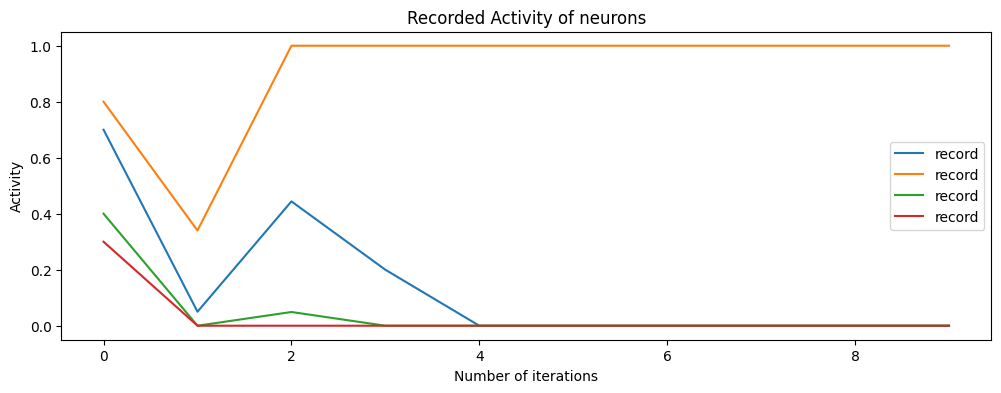

The final activity is: [0. 1. 0. 0.]


In [9]:
N = 4
w = np.zeros((N,N))
w[:] = -0.9   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 1   # set the excitatory connection

input_values = [0.7, 0.8, 0.4, 0.3]
record = []                   # for recording the activity values
activity = np.zeros(N)        # neurons are not active initially
for i in range(10):
    # the new neuron value is the old value times the weight matrix (for the neurons 
    #  inhibiting and exciting each other), plus the input benig added.
    # we also clip the neurons so their activity doesn't go below 0 or above 1
    activity = np.clip(input_values + w @ activity, 0, 1)
    record.append(activity)

plt.figure(figsize=(12,4))
plt.plot(record, label='record')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Activity')
plt.title('Recorded Activity of neurons')
plt.show()

print('The final activity is: ' + str(activity))

The expected output matches what the model's output was, as shown above.

**2. b) [1 mark]**  Test the model using all the data in the `X` dataset you created in question 1.  (This should be all 10000 sets of 4 randomly generated numbers).  Note that since we didn't use any data to train the model, we are using all of it to test the model.

To test the model, loop through all the items (`for input_values in X:`) and run the model as in question 2a.  To determine if the output is correct, you can do

```python
    target = np.zeros(N)
    target[np.argmax(input_values)] = 1
    if np.all(target == activity):
        correct += 1
```

What proportion of the time does the model produce the correct output?

In [18]:
import numpy as np

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

w = np.zeros((N,N))
w[:] = -0.9   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 1   # set the excitatory connection
    
    # the new neuron value is the old value times the weight matrix (for the neurons 
    #  inhibiting and exciting each other), plus the input benig added.
    # we also clip the neurons so their activity doesn't go below 0 or above 1
correct = 0
for input_values in X:
    activity = np.zeros(N)        # neurons are not active initially
    target = np.zeros(N)
    target[np.argmax(input_values)] = 1
    for i in range(10):
        activity = np.clip(input_values + w @ activity, 0, 1)    
    if np.all(target == activity):
        correct += 1
print('The final accuracy is: ' + str(correct/len(X)))

The final accuracy is: 0.8019


The model is correct just over 80% of the time in it's output.

**2. c) [1 mark]**  Try running the model for a longer time, rather than the 10 steps in the code provided.  Try 10, 20, 50, 100, 200, and 500.  Make a plot showing the proportion of time the model produces the ideal output for each of those numbers of timesteps.

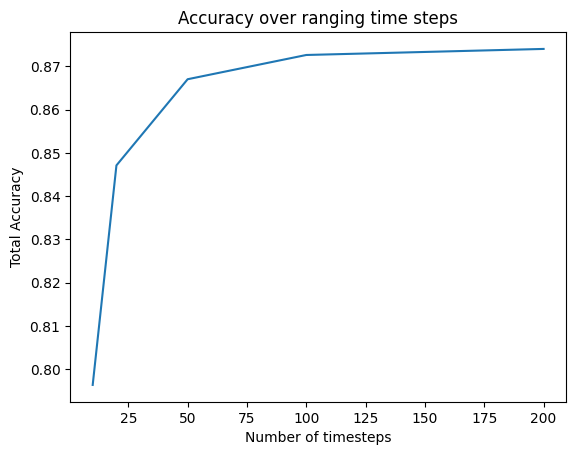

In [4]:
import numpy as np

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

w = np.zeros((N,N))
w[:] = -0.9   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 1   # set the excitatory connection
    
    # the new neuron value is the old value times the weight matrix (for the neurons 
    #  inhibiting and exciting each other), plus the input benig added.
    # we also clip the neurons so their activity doesn't go below 0 or above 1
acc = []
steps = [10,20,50,100,200]

for j in steps:
    correct = 0
    for input_values in X:
        activity = np.zeros(N)        # neurons are not active initially
        target = np.zeros(N)
        target[np.argmax(input_values)] = 1
        for i in range(j):
            activity = np.clip(input_values + w @ activity, 0, 1)    
        if np.all(target == activity):
            correct += 1
    acc.append(correct/len(X))

plt.plot(steps, acc)
plt.xlabel('Number of timesteps')
plt.ylabel('Total Accuracy')
plt.title('Accuracy over ranging time steps')
plt.show()

**2. d) [2 marks]**  Try improving the model by adjusting the amount of inhibition (-0.9) and the amount of excitation (1).  Can you improve the proportion of time the model produces the correction output?  To simplify your experimentation, keep the number of timesteps as 20.

In [19]:
import numpy as np

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)
    
    # the new neuron value is the old value times the weight matrix (for the neurons 
    #  inhibiting and exciting each other), plus the input benig added.
    # we also clip the neurons so their activity doesn't go below 0 or above 1
inhib = np.linspace(0,-1,10)
excit = np.linspace(0,1,10)
acc = np.ndarray([10,10])

for a in range(len(inhib)):
    for b in range(len(excit)):
        w = np.zeros((N,N))
        w[:] = -0.9   # set the inhibition amount everywhere
        for i in range(N):
            w[i,i] = 1   # set the excitatory connection
        correct = 0
        for input_values in X:
            activity = np.zeros(N)        # neurons are not active initially
            target = np.zeros(N)
            target[np.argmax(input_values)] = 1
            for i in range(j):
                activity = np.clip(input_values + w @ activity, 0, 1)    
            if np.all(target == activity):
                correct += 1
        acc[a,b] = correct/len(X)

m_i,m_e = np.unravel_index(np.argmax(acc),acc.shape)

print("Max accuracy: " + str(acc[m_i,m_e]))
print("Inhibtion and Excitation values: " + str(inhib[m_i]) + " and " + str(excit[m_e]))

Max accuracy: 0.8809
Inhibtion and Excitation values: 0.0 and 0.0


# 3. Action Selection with Winner-Take-All and a Synapse

We are now going to add a biological detail to the Winner-Take-All system.  In biology, when there is a connection between neurons, there is a synapse, and the activity of that synapse decays slowly over time.  This means that when a spike occurs, the input into the next neuron will suddenly increase, and then slowly decrease.

Here we will make a simple approximation of this process.  We will be implementing this as a *low-pass filter*.  The only parameter is the one that controls how quickly the synaptic activity will decay, and we will call this `tau`.  To implement a low-pass filter as part of our neuron model, we can compute the synaptic activity as follows, where `dt` is how long one timestep is in our model:

```python
alpha = 1-np.exp(-dt/tau)

activity_syn = activity_syn + alpha * (activity - activity_syn)
```

Here is what that would look like for a single input that gave a single spike on the 5th timestep, where each timestep is 0.001 seconds and the synaptic time constant is 0.01 seconds (10 milliseconds):



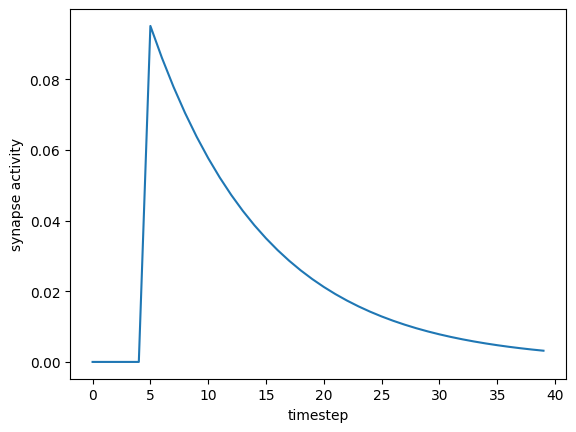

In [8]:
activity - np.zeros(1)
activity_syn = np.zeros(1)

dt = 0.001    # length of a timestep
tau = 0.010   # time constant for the synapse
alpha = 1-np.exp(-dt/tau)
record = []
for i in range(40):
    activity = 0
    if i == 5:
        activity = 1
    activity_syn = activity_syn + alpha * (activity - activity_syn)   
    record.append(activity_syn)

import matplotlib.pyplot as plt
plt.plot(record)
plt.xlabel('timestep')
plt.ylabel('synapse activity')
plt.show()

While our winner-take-all model is not spiking, we can still add this synapse model to the system.  This would be done as follows:

In [ ]:
record = []             
activity = np.zeros(N)        # the raw output from the neuron
activity_syn = np.zeros(N)    # the output from the synapse
for i in range(20):
    activity = np.clip(input_values + w @ activity_syn, 0, 1)  # note we use activity_syn here, not activity
    activity_syn += alpha * (activity - activity_syn)          # implement the synapse 

    record.append(activity_syn)    


**3. a) [1 mark]** Test the winner-take-all model with a synapse time constant of 10 milliseconds, inhibition of -0.9, and excitation of 1 against all the data in `X`, running it for 20 timesteps (with each timestep being 1 millisecond).  What proportion of time does it get the correct answer?  Repeat this for differet synapse time constants (try 0.001, 0.002, 0.005, 0.01, and 0.02 seconds) and generate a plot showing the accuracy as you change the time constant.


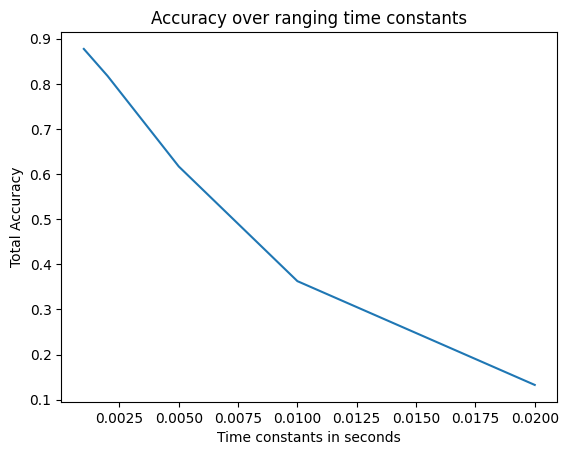

In [10]:
import numpy as np

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)

w = np.zeros((N,N))
w[:] = -0.9   # set the inhibition amount everywhere
for i in range(N):
    w[i,i] = 1   # set the excitatory connection
    
    # the new neuron value is the old value times the weight matrix (for the neurons 
    #  inhibiting and exciting each other), plus the input benig added.
    # we also clip the neurons so their activity doesn't go below 0 or above 1
dt = 0.001
t_c = [0.001,0.002,0.005,0.01,0.02]
acc = []
for a in t_c:
    alpha = 1-np.exp(-dt/a)
    correct = 0
    for input_values in X:
        target = np.zeros(N)
        target[np.argmax(input_values)] = 1
        activity = np.zeros(N)        # the raw output from the neuron
        activity_syn = np.zeros(N)    # the output from the synapse
        for i in range(20):
            activity = np.clip(input_values + w @ activity_syn, 0, 1)  # note we use activity_syn here, not activity
            activity_syn += alpha * (activity - activity_syn)          # implement the synapse    
        if np.all(target == activity):
            correct += 1
    acc.append(correct/len(X))

plt.plot(t_c, acc)
plt.xlabel('Time constants in seconds')
plt.ylabel('Total Accuracy')
plt.title('Accuracy over ranging time constants')
plt.show()

**3. b) [2 marks]** Try improving the model by adjusting the synaptic time constant, the amount of inhibition and the amount of excitation.  Can you improve the proportion of time the model produces the correct output?  To simplify your experimentation, keep the number of timesteps as 20.  As a hint, you should be able to get the model close to 99% accuracy!  This is an example of adding a biological detail to a model and having it improve its performance.


In [16]:
import numpy as np

N = 4        # how many values in the list
M = 10000    # how many random examples to make in the dataset

X = np.random.uniform(0,1,(M,N))
Y = np.argmax(X, axis=1)
    
    # the new neuron value is the old value times the weight matrix (for the neurons 
    #  inhibiting and exciting each other), plus the input benig added.
    # we also clip the neurons so their activity doesn't go below 0 or above 1
dt = 0.001
t_c = np.linspace(0.001,0.02,7)
inhib = np.linspace(0,-1,7)
excit = np.linspace(0,1,7)
acc = np.ndarray([7,7,7])
for a in range(len(t_c)):
    alpha = 1-np.exp(-dt/t_c[a])
    for b in range(len(inhib)):
        for c in range(len(excit)):
            w = np.zeros((N,N))
            w[:] = inhib[b]   # set the inhibition amount everywhere
            for i in range(N):
                w[i,i] = excit[c]   # set the excitatory connection
            correct = 0
            for input_values in X:
                target = np.zeros(N)
                target[np.argmax(input_values)] = 1
                activity = np.zeros(N)        # the raw output from the neuron
                activity_syn = np.zeros(N)    # the output from the synapse
                for i in range(20):
                    activity = np.clip(input_values + w @ activity_syn, 0, 1)  # note we use activity_syn here, not activity
                    activity_syn += alpha * (activity - activity_syn)          # implement the synapse    
                if np.all(target == activity):
                    correct += 1
            acc[a,b,c] = correct/len(X)

m_t,m_i,m_e = np.unravel_index(np.argmax(acc),acc.shape)

print("Max accuracy: " + str(acc[m_t,m_i,m_e]))
print("Time Constant, Inhibtion, and Excitation values: " + str(t_c[m_t])+ " , " + str(inhib[m_i]) + ", and " + str(excit[m_e]))

Max accuracy: 0.9902
Time Constant, Inhibtion, and Excitation values: 0.001 , -1.0, and 0.8333333333333333
